In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

%matplotlib inline

In [4]:
for i, letter_path in enumerate(os.listdir("/home/alex/Proga/Project/good_dataset_books/")):
    path = "/home/alex/Proga/Project/good_dataset_books/" + letter_path + "/"
    target_letter = open(path + "target.txt", "w")
    target_letter.write(letter_path)
    print(i, letter_path)

0 ш
1 х
2 ь
3 ы
4 ю
5 д
6 ц
7 А
8 в
9 р
10 л
11 я
12 м
13 з
14 й
15 г
16 к
17 б
18 с
19 э
20 Е
21 е
22 ф
23 п
24 Б
25 ч
26 о
27 и
28 а
29 ж
30 т
31 у
32 н


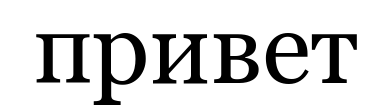

In [27]:
fig = plt.figure(figsize=(3,1))
ax = fig.add_subplot()
ax.axis([0, 20, 0, 10])
ax.text(3, 3, "привет", fontsize=100, fontname='Georgia')
ax.axis('off')
plt.show()

In [2]:
letter2number = dict()
number2letter = dict()
data = [] #np.array([[]], dtype=np.ndarray)
target = [] #np.array([[]], dtype=np.ndarray)
number_of_classes = 91

In [3]:
def vectorized_result(letter):
        e = np.zeros((number_of_classes, 1), dtype=np.float32)
        e[letter2number[letter]] = 1.0
        return e
    
def load_data(dataset_path):
    letter2number.clear()
    number2letter.clear()
    data.clear()
    target.clear()
    for i, letter_path in enumerate(os.listdir(dataset_path)):
        '''if (i > 10):
            break'''
        path = dataset_path + "/" + letter_path + "/"
        target_letter = open(path + "target.txt", "r") 
        letter = str(target_letter.read())
        number2letter[i] = letter
        letter2number[letter] = i

        files = os.listdir(path)
        for j, picture_path in enumerate(files):
            if picture_path.endswith(".png"):
                img = cv2.imread(path + "/" + picture_path)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                picture = 1 - gray/255
                #plt.subplot(1, len(files), j+1)
                #plt.title(picture_path)
                #plt.imshow(picture)
                data.append(np.array(picture, dtype=np.float32)) #.reshape(-1, 1)
                target.append(i)#vectorized_result(letter))
    #plt.show()
    d = np.array(data, dtype=np.ndarray)
    d = d.reshape((d.shape[0], d.shape[1], d.shape[2], 1))
    t = np.array(target, dtype=np.ndarray)
    #d = np.asarray(d).astype(np.float32)
    #t = np.asarray(t).astype(np.float32)
    return (d, t)

In [5]:
(X, y) = load_data("/home/alex/Proga/Project/second_dataset")
print(X.shape, y.shape)
#print(y)

(99935, 28, 28, 1) (99935,)


In [15]:
dataset_file = open("/home/alex/Proga/Project/second_dataset.pickle", "wb")
pickle.dump((X, y), dataset_file)

In [13]:
mapping_file = open("/home/alex/Proga/Project/letter_mapping.pickle", "wb")
pickle.dump(number2letter, mapping_file)
print(number2letter)

{0: 'q', 1: 'ш', 2: ';', 3: 'd', 4: 'х', 5: 'щ', 6: 'i', 7: 'ь', 8: '%', 9: '=', 10: 'o', 11: '!', 12: 'ы', 13: 'w', 14: 'ю', 15: 'f', 16: 'д', 17: '[', 18: 'ц', 19: '>', 20: '(', 21: '}', 22: 'в', 23: 'р', 24: '^', 25: 'n', 26: '-', 27: '\\', 28: '?', 29: 'л', 30: '+', 31: '~', 32: '&', 33: ']', 34: '`', 35: 'j', 36: 'l', 37: 'b', 38: '|', 39: 'я', 40: '{', 41: 'м', 42: 's', 43: 'a', 44: 'з', 45: 'й', 46: 'г', 47: 'к', 48: 'c', 49: '<', 50: '/', 51: '.', 52: 'б', 53: '"', 54: 'ё', 55: 'с', 56: '*', 57: 'r', 58: 'э', 59: 'z', 60: ')', 61: 'ъ', 62: 'е', 63: 'ф', 64: 'g', 65: ':', 66: 'п', 67: 'ч', 68: 'о', 69: 'и', 70: 'p', 71: 'а', 72: "'", 73: 'y', 74: 'u', 75: '#', 76: 'm', 77: 'ж', 78: 'e', 79: 'k', 80: '_', 81: 'h', 82: '$', 83: 'т', 84: 'x', 85: '@', 86: ',', 87: 't', 88: 'у', 89: 'н', 90: 'v'}


In [8]:
dataset_file_read = open("/home/alex/Proga/Project/second_dataset.pickle", "rb")
(X_, y_) = pickle.load(dataset_file_read)
print(X_.shape, y_.shape)

(99935, 28, 28, 1) (99935,)


In [14]:
mapping_file_read = open("/home/alex/Proga/Project/letter_mapping.pickle", "rb")
letter_mapping = pickle.load(mapping_file_read)
print(letter_mapping)

{0: 'q', 1: 'ш', 2: ';', 3: 'd', 4: 'х', 5: 'щ', 6: 'i', 7: 'ь', 8: '%', 9: '=', 10: 'o', 11: '!', 12: 'ы', 13: 'w', 14: 'ю', 15: 'f', 16: 'д', 17: '[', 18: 'ц', 19: '>', 20: '(', 21: '}', 22: 'в', 23: 'р', 24: '^', 25: 'n', 26: '-', 27: '\\', 28: '?', 29: 'л', 30: '+', 31: '~', 32: '&', 33: ']', 34: '`', 35: 'j', 36: 'l', 37: 'b', 38: '|', 39: 'я', 40: '{', 41: 'м', 42: 's', 43: 'a', 44: 'з', 45: 'й', 46: 'г', 47: 'к', 48: 'c', 49: '<', 50: '/', 51: '.', 52: 'б', 53: '"', 54: 'ё', 55: 'с', 56: '*', 57: 'r', 58: 'э', 59: 'z', 60: ')', 61: 'ъ', 62: 'е', 63: 'ф', 64: 'g', 65: ':', 66: 'п', 67: 'ч', 68: 'о', 69: 'и', 70: 'p', 71: 'а', 72: "'", 73: 'y', 74: 'u', 75: '#', 76: 'm', 77: 'ж', 78: 'e', 79: 'k', 80: '_', 81: 'h', 82: '$', 83: 'т', 84: 'x', 85: '@', 86: ',', 87: 't', 88: 'у', 89: 'н', 90: 'v'}
